In [1]:
# Imports
from sklearn.svm import SVC
from sklearn.datasets import make_circles
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import cross_val_score

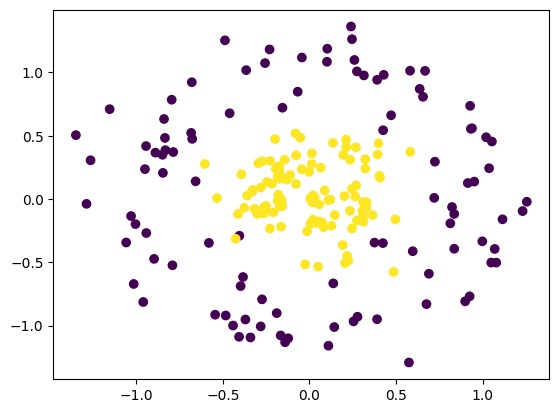

In [38]:
# Data
features, target = make_circles(n_samples=200, random_state=42, factor=0.2, noise=0.2)

_, ax = plt.subplots()
scatter = ax.scatter(features[:, 0], features[:, 1], c=target)

In [3]:
# color regions
def plot_decision_regions(X, y, classifier):
  cmap = ListedColormap(("red", "blue"))
  xxl, xx2 = np.meshgrid(np.arange(-1.5, 1.5, 0.1), np.arange(-1.5, 1.5, 0.1))
  Z = classifier.predict(np.array([xxl.ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xxl.shape)
  plt.contourf(xxl, xx2, Z, alpha=0.1, cmap=cmap)

  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                alpha=0.8, c=cmap(idx),
                marker="+", label=cl)

<ipython-input-3-6cd97f09e61a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


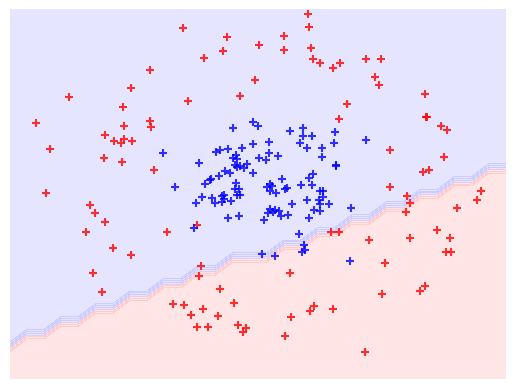

In [39]:
# Linear support vector classifier (SVC)
svc_linear = SVC(kernel="linear", random_state=0, C=1)

# fit model
linear_model = svc_linear.fit(features, target)

# Visualize

plot_decision_regions(features, target, classifier=svc_linear)
plt.axis("off")
plt.show()

<ipython-input-3-6cd97f09e61a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


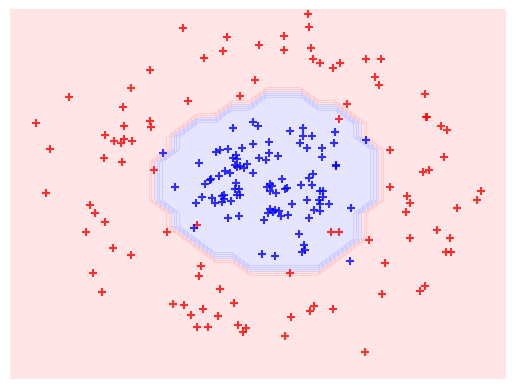

In [40]:
# RBF support vector classifier (SVC)
rbf_svc = SVC(kernel="rbf", random_state=0, gamma=1, C=1)

rbf_model = rbf_svc.fit(features, target)

plot_decision_regions(features, target, classifier=rbf_svc)
plt.axis("off")
plt.show()

<ipython-input-3-6cd97f09e61a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


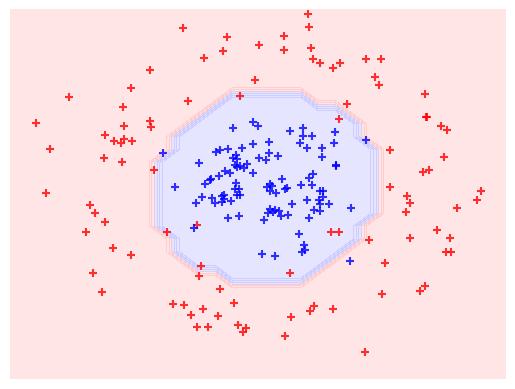

In [41]:
# Polynomial support vector classifier (SVC)
poly_svc = SVC(kernel="poly", random_state=0, degree=2, gamma=1, C=1)

poly_model = poly_svc.fit(features, target)

plot_decision_regions(features, target, classifier=poly_svc)
plt.axis("off")
plt.show()

<ipython-input-3-6cd97f09e61a>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


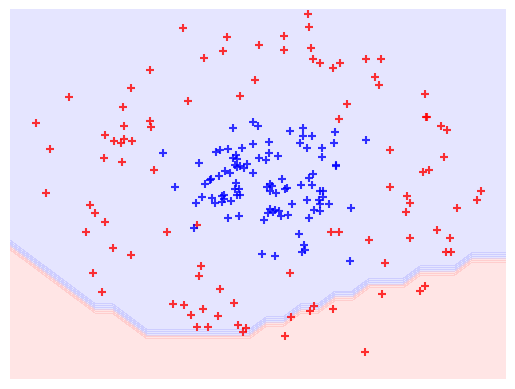

In [42]:
# Sigmoid support vector classifier (SVC)
sigm_svc = SVC(kernel="sigmoid", random_state=0, gamma=1, C=1)

sigm_model = sigm_svc.fit(features, target)

plot_decision_regions(features, target, classifier=sigm_svc)
plt.axis("off")
plt.show()

In [43]:
# Models
models = {'Linear': SVC(kernel="linear", random_state=0, C=1),
          'RBF': SVC(kernel="rbf", random_state=0, gamma=1, C=1),
          'Polynomial': SVC(kernel="poly", random_state=0, degree=2, gamma=1, C=1),
          'Sigmoid': SVC(kernel="sigmoid", random_state=0, gamma=1, C=1)}

In [36]:
# Indicators
indicators = ['accuracy', 'precision', 'recall', 'f1']

In [44]:
for name, model in models.items():
  print(name)

  for metric in indicators:
    score = cross_val_score(model, features, target, scoring=metric)
    print(f'  {metric}: {score.mean()}')

  print()

Linear
  accuracy: 0.615
  precision: 0.5726515151515151
  recall: 0.9099999999999999
  f1: 0.7027808417997098

RBF
  accuracy: 0.9650000000000001
  precision: 0.9532467532467533
  recall: 0.9800000000000001
  f1: 0.9658357902260342

Polynomial
  accuracy: 0.9450000000000001
  precision: 0.9190476190476191
  recall: 0.9800000000000001
  f1: 0.9476718403547671

Sigmoid
  accuracy: 0.5650000000000001
  precision: 0.5291857864912892
  recall: 0.86
  f1: 0.6505814192743136

